In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline

In [3]:
#read in data and make a copy
anes = pd.read_csv('data/anes_pilot_2020ets_csv.csv')
data = anes.copy(deep = True)

In [4]:
data.shape

(3080, 470)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Columns: 470 entries, V1 to vidknow
dtypes: float64(3), int64(453), object(14)
memory usage: 11.0+ MB


In [6]:
data.head()

,V1,StartDate,EndDate,_v1,RecordedDate,ResponseId,qmetadata_Browser,qmetadata_Version,_v2,qmetadata_Resolution,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
0,1451,4/12/2020 17:04,4/12/2020 17:23,1131,4/12/2020 17:23,R_3oBJppI62KNh4MC,Chrome,81.0.4044.96,Android 9,360x760,...,9,1,0,0,0,0,0,1,2.0,1
1,2875,4/16/2020 10:14,4/16/2020 11:06,3170,4/16/2020 11:06,R_1jdLlxoKBpgExZS,Firefox,52,Windows NT 5.1,1024x768,...,16,1,0,0,0,0,0,1,3.0,0
2,859,4/17/2020 21:34,4/17/2020 22:32,3490,4/17/2020 22:32,R_ClTXw6WOcfMOLWp,Chrome,81.0.4044.111,Android 9,360x760,...,6,0,0,0,0,0,0,5,3.0,0
3,2031,4/16/2020 17:29,4/16/2020 18:34,3885,4/16/2020 18:34,R_3sjr4zeG5BbBJa0,Chrome,78.0.3904.96,Android 7.1.1,320x570,...,13,1,0,0,0,0,0,1,3.0,1
4,587,4/16/2020 15:20,4/16/2020 15:59,2330,4/16/2020 15:59,R_21H8jh0vE4GUqI5,Chrome,80.0.3987.132,Windows NT 10.0,1920x1080,...,4,0,1,0,0,0,0,2,2.0,0


In [5]:
data.describe()

,V1,_v1,follow,reg1,votemail1a,votemail1b,votecount,votemail2,voterid1,voterid2,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3078.000000,3080.000000
mean,1540.50000,3798.924026,1.644156,1.290584,46.673377,39.099351,3.329221,2.751948,1.547727,3.457468,...,8.692857,0.701623,0.106169,0.005195,0.036364,0.001948,0.034091,1.785714,1.816439,0.407792
std,889.26374,10553.322567,0.876972,0.724222,42.500686,36.917557,1.093571,1.310572,0.776603,2.807707,...,5.998361,0.457620,0.308104,0.071899,0.187224,0.044101,0.282326,1.430945,1.272351,0.491504
min,1.00000,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,770.75000,1643.750000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1540.50000,2233.500000,1.000000,1.000000,88.000000,7.000000,3.000000,3.000000,1.000000,2.000000,...,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,2310.25000,3211.250000,2.000000,1.000000,88.000000,77.000000,4.000000,4.000000,2.000000,7.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000
max,3080.00000,255418.000000,9.000000,4.000000,88.000000,77.000000,9.000000,9.000000,9.000000,9.000000,...,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,3.000000,1.000000


In [7]:
#make a target variable
data.drop(data[data['mis_covid2'] == 9].index, inplace=True)
data.drop(data[data['mis_covid1'] == 9].index, inplace=True)

In [10]:
data.rename(columns={"mis_covid1": 'covid_lab'}, inplace = True)
data.rename(columns={"mis_covid2": 'covid_vax'}, inplace = True)
data.covid_lab.replace((2,1), (0,1), inplace=True)
data.covid_vax.replace((2,1), (0,1), inplace=True)
data['covid_mis_score'] = data['covid_lab'] + data['covid_vax']
data.drop(inplace=True, columns=['covid_lab', 'covid_vax'])

In [12]:
data['covid_mis_score'].value_counts()

0    1578
1    1002
2     494
Name: covid_mis_score, dtype: int64

<AxesSubplot:xlabel='viol3_dems', ylabel='count'>

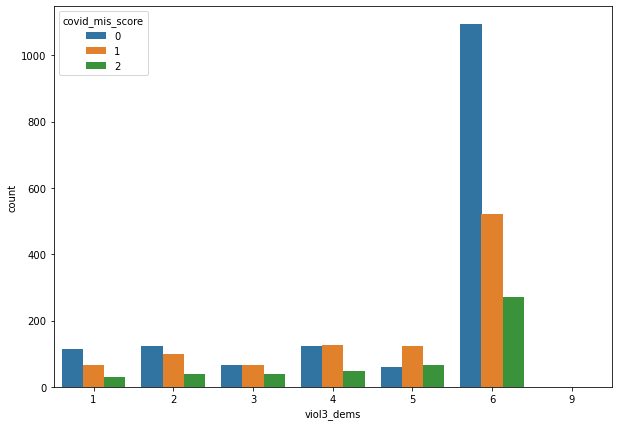

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x=data['viol3_dems'], hue='covid_mis_score')